# CAIS++ Linear Regression Workshop
Before you go through this code, make sure you read [Lesson 2](http://caisplusplus.usc.edu/blog/curriculum/lesson2) from our curriculum!

---

## Part 1: Importing the Data

In [184]:
import numpy as np
from sklearn.datasets import load_boston

In [185]:
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names'])


In [186]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [191]:
# Investigate shape of the input data array
data = boston.data
target = boston.target

print(data.shape)
print(target.shape)
print(boston.feature_names)

num_features = len(boston.feature_names)
num_samples = data.shape[0] # 506 training examples

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [188]:
# Use Pandas to get an overview of the training data

import pandas as pd
bos_dataframe = pd.DataFrame(boston.data)
bos_dataframe.columns = boston.feature_names
bos_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [189]:
# Add in the target variable: price

bos_dataframe['PRICE'] = target
bos_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [190]:
bos_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Part 2: Setting up the Machine Learning Objective

In [133]:
# randomly initialize weights between (-1, 1)
weights_init = np.random.uniform(low=-1, high=1, size=num_features)
# When we get to neural networks, we'll need to pass in a tuple for "size"

weights_init

array([-0.76785398,  0.21502061,  0.88823062,  0.19142508, -0.99814865,
       -0.08783704,  0.03386962, -0.31151847, -0.46510021,  0.69638445,
        0.02855919,  0.55148496, -0.25995441])

In [134]:
# initialize bias to 0
bias_init = 0

In [135]:
# Normalize the input data: mean-centered, bounded by 1
# For each feature: calculate mean and max
    # Subtract mean, divide by maximum

for i in range(num_features):
    feature_avg = np.mean(data[:, i])
    feature_max = np.amax(data[:, i])
    data[:, i] = (data[:, i]-feature_avg)/feature_max

In [136]:
# Hypothesis function: output vector of predicted prices

def hypothesis(weights, bias):
    return data.dot(weights) + np.repeat(bias, num_samples)

In [137]:
hypothesis(weights_init, bias_init).shape

(506,)

In [138]:
# Cost function: Mean-Squared Error

def cost(weights, bias):
    return np.mean(np.square(hypothesis(weights, bias) - target))/2
cost(weights_init, bias_init)

295.664540754163

In [139]:
# Gradient: return weight gradient vector, bias gradient at current step

def gradient(weights, bias):
    weight_gradients = []
    
    for (weight_num, weight) in enumerate(weights):
        grad = np.mean((hypothesis(weights, bias)-target) * data[:, weight_num])
        weight_gradients.append(grad)
        
    weight_gradients = np.array(weight_gradients)
    
    bias_gradient = np.mean(hypothesis(weights, bias) - target)
    
    return (weight_gradients, bias_gradient)

In [140]:
# Check to make sure it works
# Initial gradient should be large

gradient(weights_init, bias_init)

(array([ 0.33189849, -0.76866507,  1.11203467, -0.39296053,  0.51701471,
        -0.51056902,  0.97088334, -0.39898933,  1.24281228,  1.01353381,
         0.45762662, -0.67230857,  1.2635274 ]), -22.53280632411067)

## Part 3: Training the Model

In [161]:
# Gradient descent algorithm:
# Repeat for desired iterations: Calculate gradient, move down one step
# Cost should decrease over time

LEARNING_RATE = 0.01

def gradient_descent(weights, bias, num_epochs):
    costs = []
    weights = weights
    bias = bias
    
    for i in range(num_epochs):
        weights_gradient, bias_gradient = gradient(weights, bias)
        
        weights = weights - LEARNING_RATE * weights_gradient
        bias = bias - LEARNING_RATE * bias_gradient
        costs.append(cost(weights, bias))
        
    return costs, weights, bias

In [162]:
costs, trained_weights, trained_bias = gradient_descent(weights_init, bias_init, 1000)

In [163]:
print(trained_weights)
print(trained_bias)

[-2.08234251  3.00527163 -2.95269932  3.0826507  -2.45303975  3.66219727
 -2.33576081 -0.70454034 -2.64740433 -2.35693417 -2.73670533  2.99742472
 -7.61446618]
22.5318335548


In [164]:
costs[-1] # ending MSE cost

23.055128514284803

## Part 4: Evaluating the Model

In [145]:
import matplotlib.pyplot as plt

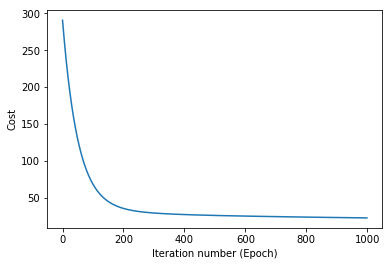

In [146]:
plt.plot(costs)
plt.xlabel("Iteration number (Epoch)")
plt.ylabel("Cost")
plt.show()

In [147]:
# Final predicted prices
new_hypotheses = hypothesis(trained_weights, trained_bias)

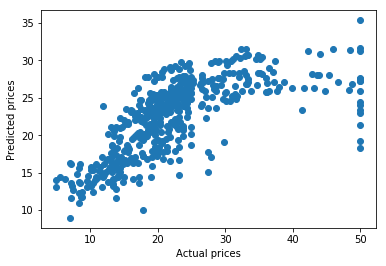

In [148]:
# Make sure predictions, actual values are correlated

plt.scatter(target, new_hypotheses)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.show()

## Congratulations! You just did machine learning

Additional links:
* https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

---

# Sklearn built-in functionality

In [149]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [150]:
# Yep it's that easy
regr.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
# Compare weights
print(regr.coef_)
print(trained_weights)

[ -9.53562887   4.63952195   0.57866304   2.6885614  -15.50010579
  33.4057266    0.07510617 -17.89578905   7.33572092  -8.76616522
 -20.9761982    3.7278883  -19.95196805]
[-2.08234251  3.00527163 -2.95269932  3.0826507  -2.45303975  3.66219727
 -2.33576081 -0.70454034 -2.64740433 -2.35693417 -2.73670533  2.99742472
 -7.61446618]


In [152]:
# Compare bias/intercept
print(regr.intercept_)
print(trained_bias)

22.5328063241
22.5318335548


In [167]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target, regr.predict(data)))
print(mean_squared_error(target, new_hypotheses)) # sklearn doesn't divide by 2

22.2133113796
46.1102570286


## Train-Test Split

In [168]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.25, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [169]:
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [170]:
print(mean_squared_error(Y_train, regr.predict(X_train)))
print(mean_squared_error(Y_test, regr.predict(X_test)))

21.5147127322
24.2981057684


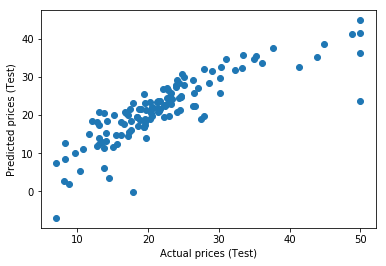

In [171]:
plt.scatter(Y_test, regr.predict(X_test))
plt.xlabel("Actual prices (Test)")
plt.ylabel("Predicted prices (Test)")
plt.show()

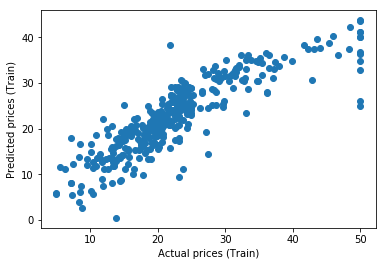

In [172]:
plt.scatter(Y_train, regr.predict(X_train))
plt.xlabel("Actual prices (Train)")
plt.ylabel("Predicted prices (Train)")
plt.show()

## Regression Trees
---
There are other models that can learn to generate these regression predictions as well. Regression trees are another example of such a model. More on regression trees here: https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/. (Or, if you prefer videos: [here](https://www.youtube.com/watch?time_continue=34&v=zvUOpbgtW3c).)

Basically, regression trees are kind of like top-down flowcharts: the model asks a series of questions about the data (e.g. does this house have more than 2 windows?) and, based on the answers, keeps filtering the data into smaller groups with shared characteristics, and then predicts some feature value (e.g. average house price) for each of those distinct groups. 

If you're familiar with the concept of "greedy" algorithms, regression trees train themselves by, at each iteration, finding the feature split (i.e. question to ask) that results in the greatest decrease in the final cost. The resulting "flowchart" can typically make pretty reasonable predictions for the final output value, given some new input features.

### Simple Regression Tree

In [174]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [175]:
tree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [176]:
mean_squared_error(Y_test, tree.predict(X_test))

30.943779527559059

### Random Forest
Another cool thing we can do is use multiple regression trees instead of one. In a random forest, we train multiple regression trees separately, but use different input features for each. We then combine them into a final predictor at the end. Combining multiple smaller models into an **ensemble** is useful because it helps prevent *overfitting* by allowing the "errors" from different models to sort of cancel each other out. Where one model falls short, another one can step in.

* [XGBoost vs. Random Forest](https://stats.stackexchange.com/questions/173390/gradient-boosting-tree-vs-random-forest)
* [Quora: How does Random Forest work for regression?](https://www.quora.com/How-does-random-forest-work-for-regression-1)_

In [180]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [182]:
rfr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [183]:
mean_squared_error(Y_test, rfr.predict(X_test))

11.379338582677162

### Gradient Boosting
Gradient boosting is a more intelligent way of combining multiple weak learners/small regression trees. Basically, what it does is create the small trees iteratively (rather than in parallel, like in a random forest), and for each new tree, it figures out how best to create the tree so that it results in the maximum reduction in overall error.

* [Gradient boosting, explained](http://matthewemery.ca/Why-Kagglers-Love-XGBoost/)
* [XGBoost vs. Random Forest](XGBoost vs. Random Forest)

In [177]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [178]:
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [179]:
mean_squared_error(Y_test, gbr.predict(X_test))

7.6296900284901241

## Additional Datasets/Tutorials:
* Pandas, categorial variables tutorial: http://benalexkeen.com/linear-regression-in-python-using-scikit-learn/
* Wine quality: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
* Auto MPG: https://archive.ics.uci.edu/ml/datasets/Auto+MPG
* News popularity: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity
* Communities and crime: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime